# Plotting Arakawa Rotation Lat/Lon Grids

This tutorial provides a workflow for plotting Arakawa Rotated Latitude-Longitude Grids using `grib2io` v2.1.0 or newer.  These grids are defined by [NCEP Grid Definition Template 32769](https://www.nco.ncep.noaa.gov/pmb/docs/grib2/grib2_doc/grib2_temp3-32769.shtml).  This grid definition is not used often, but currently is being used by the NCEP/RAP model.  The grid definition suggests this grid behaves like a geographic lat/lon and a projected grid.

In [3]:
import grib2io
import numpy as np
import pyproj
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature 

## Open file and read GRIB2 messages

The file used in this tutorial can be found in the `grib2io` repository in `tests/data`.  The file contains 1 GRIB2 message, Soil Temperature (TSOIL).

In [4]:
g = grib2io.open("rap.tsoil.gdt32769.grib2")
msg = g[0]

`grib2io` defines the `projParameters` attribute as the following...

In [5]:
print(msg.projParameters)

{'a': 6371229.0, 'b': 6371229.0, 'proj': 'aeqd', 'lon_0': 254.0, 'lat_0': 54.0}


## Get the latitude and logitude grids

In [6]:
lats, lons = msg.latlons()

## Define the map projection using Cartopy

**IMPORTANT:** At this time, using `cartopy.crs.Projection` does not work with `msg.projParameters` despite that it does define the correction projection.

Therefore we will use the actual projection class and the GRIB2 message metadata to definte the Azimuthal Equidistant projection.

In [7]:
cp = ccrs.AzimuthalEquidistant(central_latitude=msg.latitudeCenterGridpoint, central_longitude=msg.longitudeCenterGridpoint)

## Definte the map projection in pyproj

Once the `pyproj.Proj` is defined, we can generate the `x` and `y` projection coordinates of the longitudes and latitudes.

In [8]:
P = pyproj.Proj(cp.proj4_init)
xcoord, ycoord = P(lons,lats)

## Plot

Here we use the cartopy projection object to define the projection of the plot and pass in the projection coordinates.

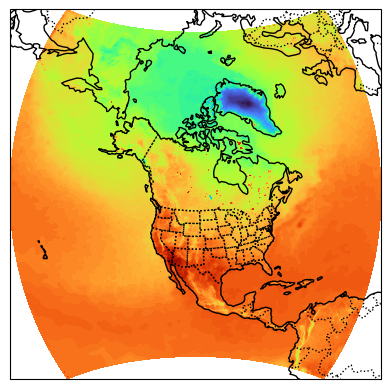

In [9]:
ax = plt.axes(projection=cp)
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':')
plt.contourf(xcoord, ycoord, msg.data, cmap='turbo', levels=np.arange(240,320,1))